In [2]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


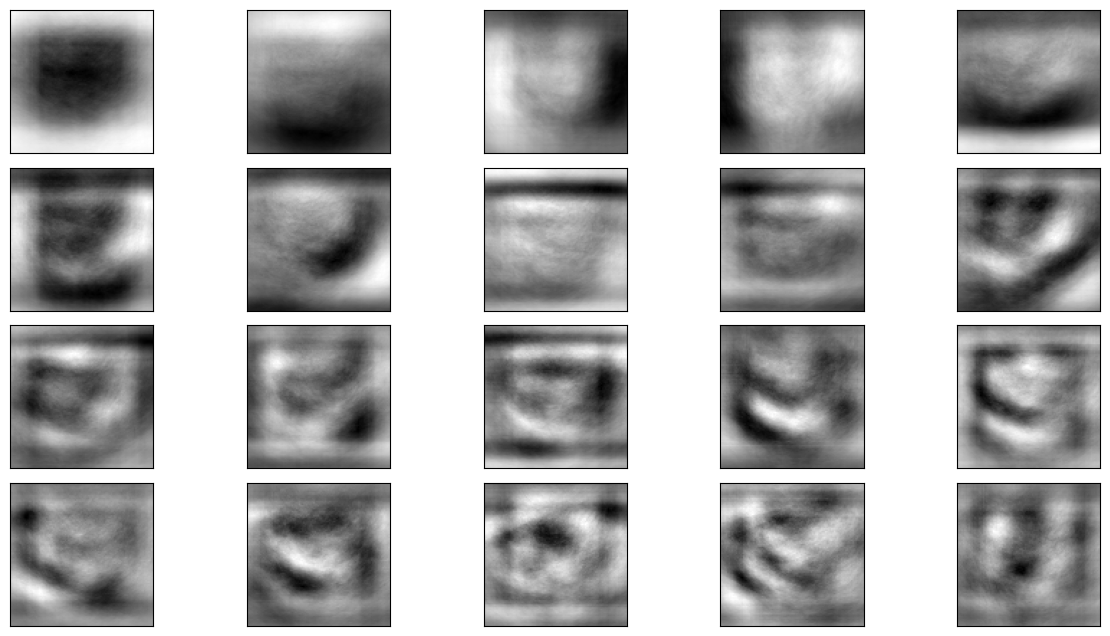

In [3]:
# Step 2: Load Images
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    labels = []
    for category in os.listdir(folder):
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            img = cv2.imread(os.path.join(category_folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, target_size)  # Resize image to a fixed size
                images.append(img_resized)
                labels.append(category)  # Assuming folder names are the labels
    return np.array(images), np.array(labels)

# Load images from a folder
train_folder = 'dataset/train'
test_folder = 'dataset/test'
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# Step 3: Flatten Images
train_data = np.array([img.flatten() for img in train_images])
test_data = np.array([img.flatten() for img in test_images])

# Step 4: Standardize Data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Step 5: Perform PCA
pca = PCA(n_components=20)  
pca.fit(train_data_scaled)
train_data_pca = pca.transform(train_data_scaled)
test_data_pca = pca.transform(test_data_scaled)

# Step 6: Visualize Eigenfaces
fig, axes = plt.subplots(4,5, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(100, 100), cmap='gray')
plt.show()



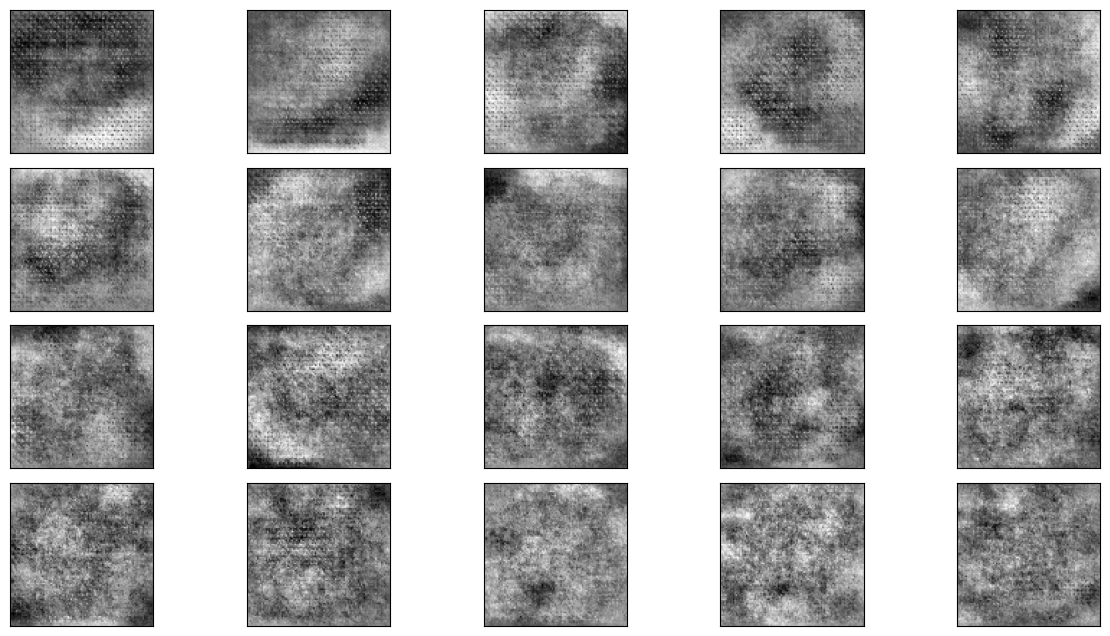

In [12]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to load images from a folder
def load_images_from_folder(folder, target_size=(100, 100)):
    
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
    return np.array(images)

# Load images from a folder
image_folder = 'generated_images'
images = load_images_from_folder(image_folder)

# Flatten Images
data = np.array([img.flatten() for img in images])

# Standardize Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=20) 
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Visualize Eigenfaces
fig, axes = plt.subplots(4, 5, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(100, 100), cmap='gray')
plt.show()
